In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [15]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import cross_validation
from implementations import ridge_regression
from cost import compute_loss
from plots import plot_cross_validation

### Load train and test data

In [16]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [17]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [35]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 1
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 0

In [19]:
# get train and test data
train_index = jet_train_samples[0]
x, y = X[train_index], Y[train_index]

### Best degree

In [20]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))
        

1 81.68087917367282 81.6718712466971
2 82.57900285584648 82.50960845544078
3 82.9610056850028 82.86792377292016
4 83.32032188325726 83.2122267595484
5 83.69865481623829 83.62859316198255
6 83.83977900552486 83.73869004724158
7 84.08466116849493 84.04796220674193
8 84.2634852003096 84.18208023060293
9 84.1720714228521 83.92485387140684
10 83.0023754237062 82.63071502922571
11 84.40327488189607 84.35122908159181
12 84.4316331705234 84.31419649291377
13 83.9415352176582 83.84778605172552
14 84.32387167373956 84.16306349587636
15 74.40514319267623 74.78981503723277
16 79.27776443270078 78.37697173512692
17 75.27891210932286 73.73688846184643
18 77.83449435503243 76.23308511490112
19 67.3439293244722 68.74549603651212


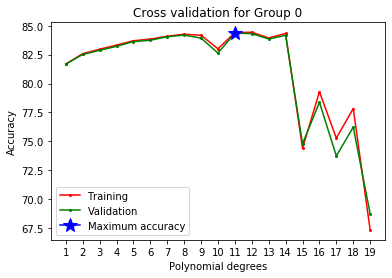

In [28]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.plot(best_degree, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("degree_group0")
plt.show()

### Best lambda

In [36]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

1e-08 76.11765019884164 76.74753783329331
1e-07 84.30685670056316 84.17207142285211
1e-06 84.40627752422132 84.34422291616622
1e-05 84.43096591667333 84.35423172391705
0.0001 84.4329676782235 84.3672431739931
0.001 84.40327488189607 84.35122908159181
0.01 84.18641738062828 84.10100888782128


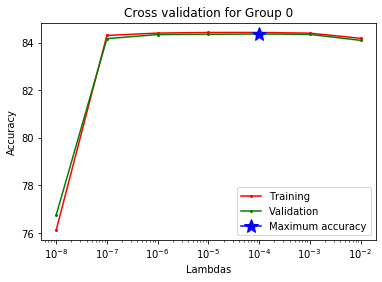

In [37]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xlabel("Lambdas")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group0")
plt.show()